# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
#read the data
learn = pd.read_csv('/ExtraaLearn.csv')

In [ ]:
#copying data to another variable to avoid any changes to original data
data = learn.copy()

## Data Overview

In [ ]:
#view top 5 rows of the data
data.head(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
#view last 5 rows of the data
data.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [ ]:
#get the shape of data
data.shape

(4612, 15)

In [ ]:
#check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
#checking for duplicate values
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4607,False
4608,False
4609,False
4610,False


In [ ]:
#print the statistical summary of the data
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [ ]:
#making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

#printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [ ]:
#checking the number of unique values
data["ID"].nunique()

4612

In [ ]:
#drop "ID" column from data
data.drop(["ID"], axis = 1, inplace = True)

## Observations
The dataset consists of 4,612 leads and includes 15 columns that capture various attributes related to the leads. The dataset captures both quantitative (age, website visits, time spent) and categorical (occupation, interaction type, status) variables.

## Sanity Checks

The dataset contains a consistent total of 4,612 entries. All columns are of the expected data types, facilitating appropriate analyses. There are no null values present in any of the columns, indicating completeness. The dataset contains no duplicate entries, ensuring each lead is unique. The dataset occupies approximately 540.6 KB, indicating efficient usage for processing and analysis.

## Exploratory Data Analysis (EDA)

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

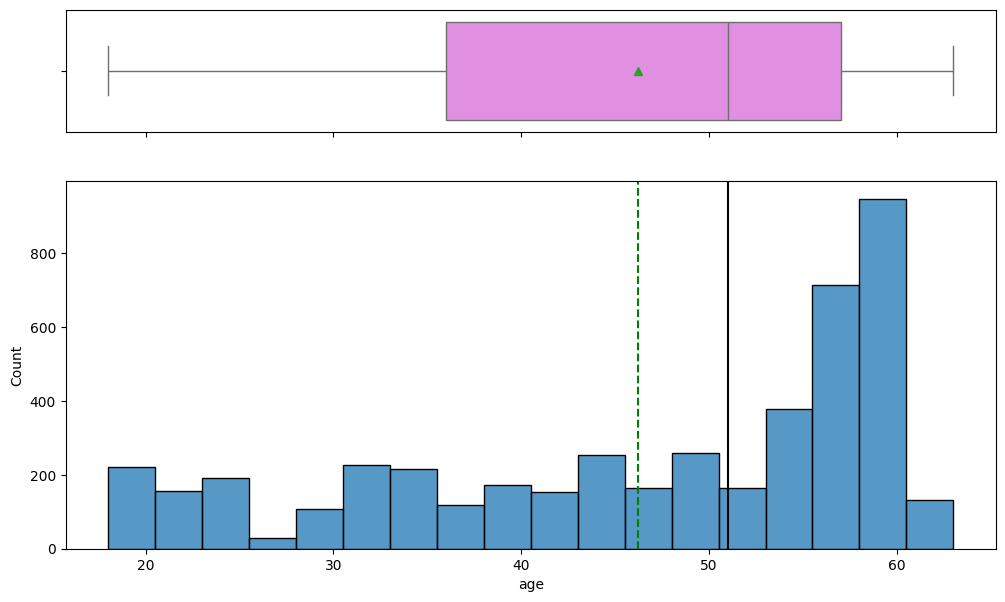

In [ ]:
#observations on age
histogram_boxplot(data, "age")

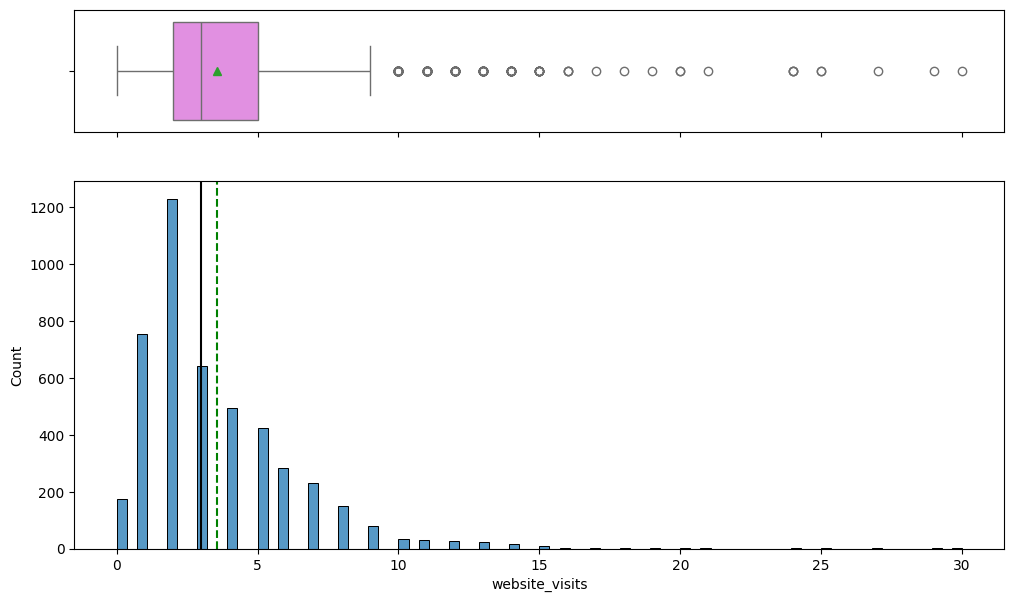

In [ ]:
#observations on website_visits
histogram_boxplot(data, "website_visits")

In [ ]:
#check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

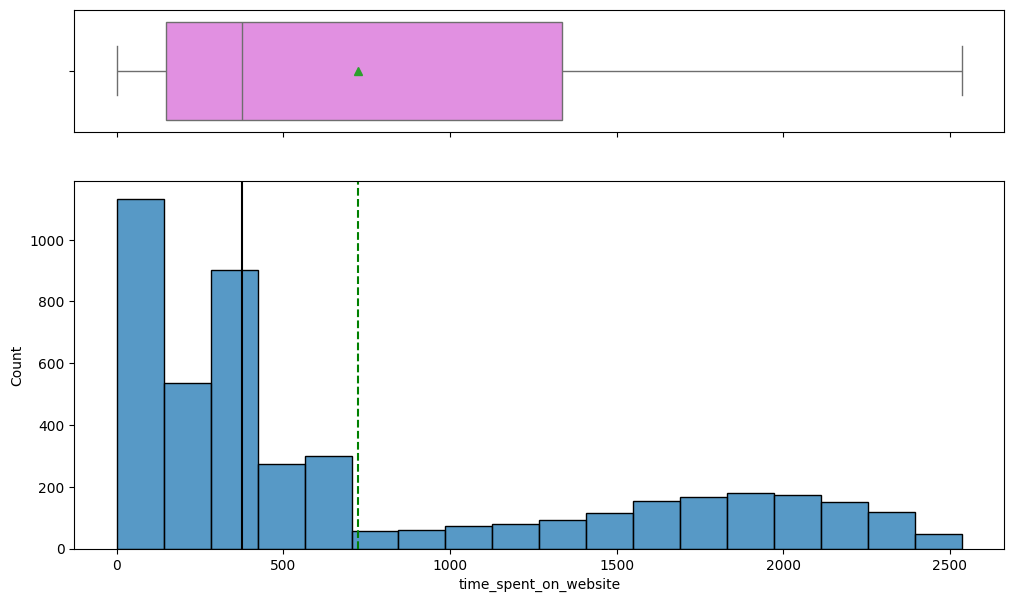

In [ ]:
#observations on number of time_spent_on_website
histogram_boxplot(data, "time_spent_on_website")

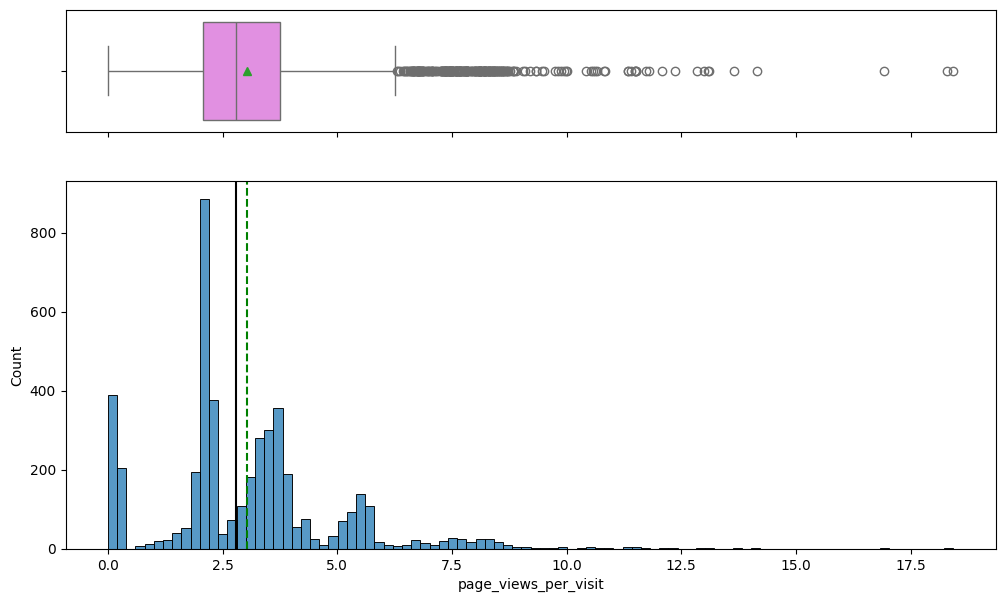

In [ ]:
#observations on number of page_views_per_visit
histogram_boxplot(data, "page_views_per_visit")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

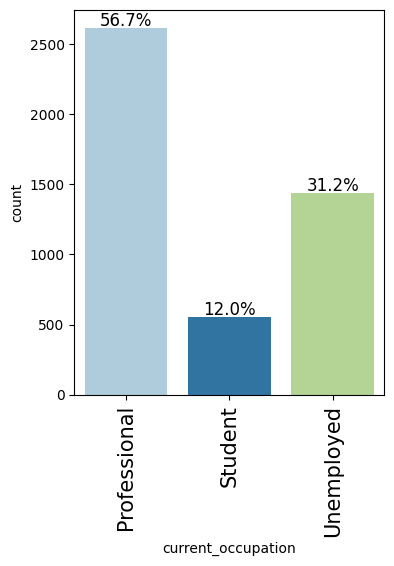

In [ ]:
#observations on current_occupation
labeled_barplot(data, "current_occupation", perc=True)

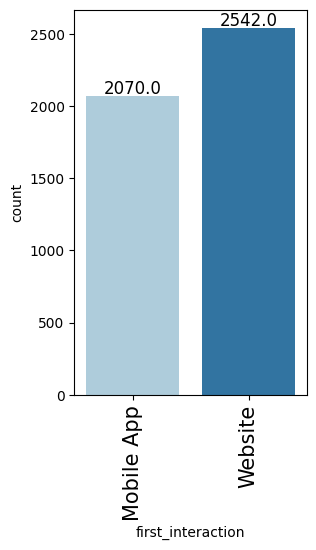

In [ ]:
#observations on number of first_interaction
labeled_barplot(data, "first_interaction")

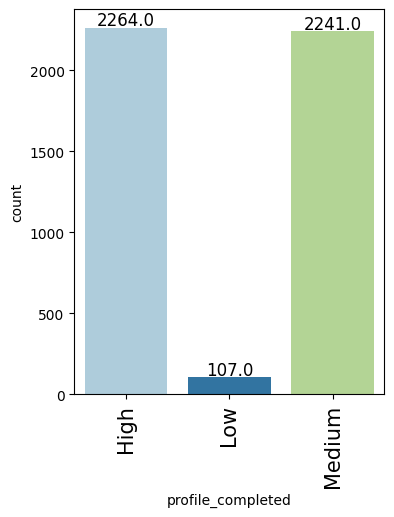

In [ ]:
#observations on profile_completed
labeled_barplot(data, "profile_completed")

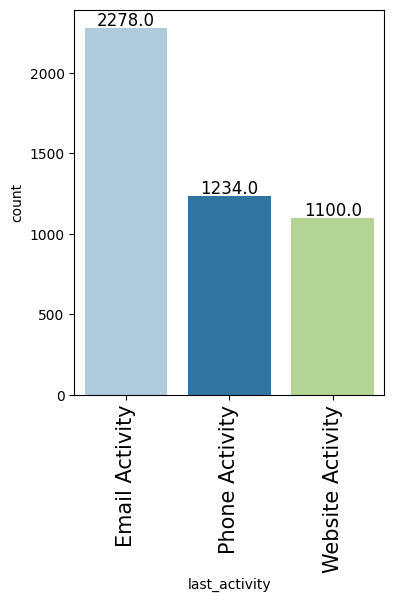

In [ ]:
#observations on last_activity
labeled_barplot(data, "last_activity")

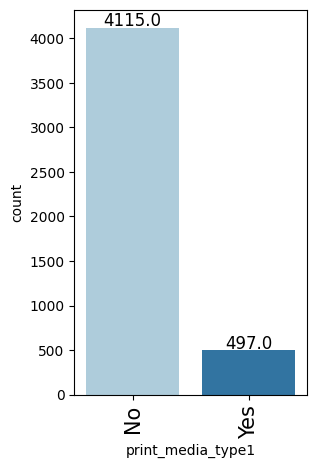

In [ ]:
#observations on print_media_type1
labeled_barplot(data,"print_media_type1")

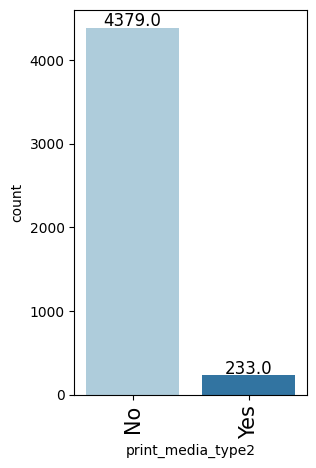

In [ ]:
#observations on print_media_type2
labeled_barplot(data, "print_media_type2")

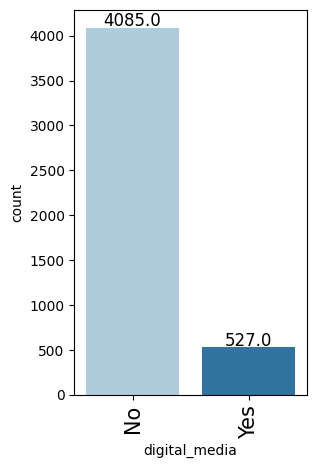

In [ ]:
#observations on digital_media
labeled_barplot(data, "digital_media")

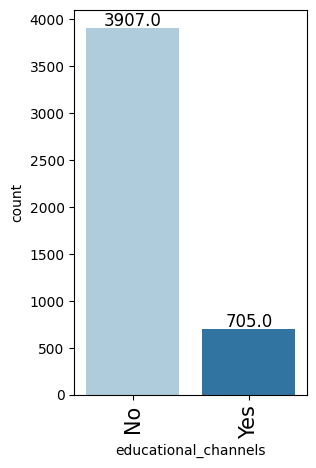

In [ ]:
#observations on educational_channels
labeled_barplot(data, "educational_channels")

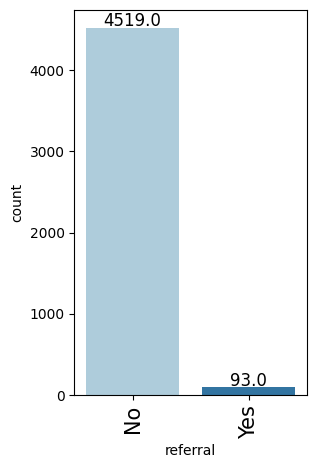

In [ ]:
#observations on referral
labeled_barplot(data, "referral")

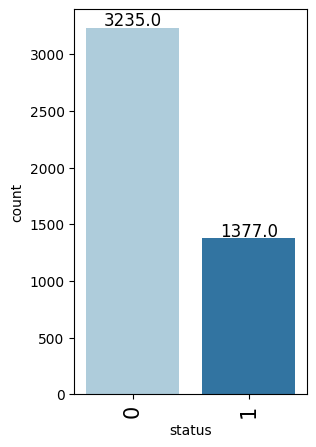

In [ ]:
#observations on status
labeled_barplot(data, "status")

**Questions**
1. **Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

These data show that professionals make up the majority of the leads. Analyzing their conversion rates can help better understand how occupation influences lead status.

* Professionals: 57% of leads (2,628 out of 4,611)
* Students: 12% of leads (553)
* Unemployed: 31% of leads (1,430)

2. **The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**

The first interaction channel with the company can significantly influence the likelihood of lead conversion. Comparing conversion rates for each channel will reveal which are the most successful.

* Mobile App: 45% of first interactions (2,070)
* Website: 55% of first interactions (2,542)

3. **The company uses multiple modes to interact with prospects. Which way of interaction works best?**

These data show that email communication is the most common method of interacting with leads. However, further analysis of conversion rates will show which mode of interaction is the most effective.

* Email Activity: 49% of interactions (2,278)
* Phone Activity: 27% of interactions (1,234)
* Website Activity: 24% of interactions (1,100)

4. **The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

Although referral leads make up a small proportion of the total, they have high conversion potential. Digital and educational media channels cover a larger number of leads and could be promising.

* Print Media Type 1: 11% of leads (497)
* Print Media Type 2: 5% of leads (233)
* Digital Media: 11% of leads (527)
* Educational Channels: 15% of leads (705)
* Referrals: 2% of leads (93)

5. **People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

Leads with a higher level of profile completion are more likely to have higher conversion rates. Additional information from leads could increase their chances of conversion.

* High Profile Completion: 49% of leads (2,264)
* Medium Profile Completion: 49% of leads (2,241)
* Low Profile Completion: 2% of leads (107)

## Data Preprocessing

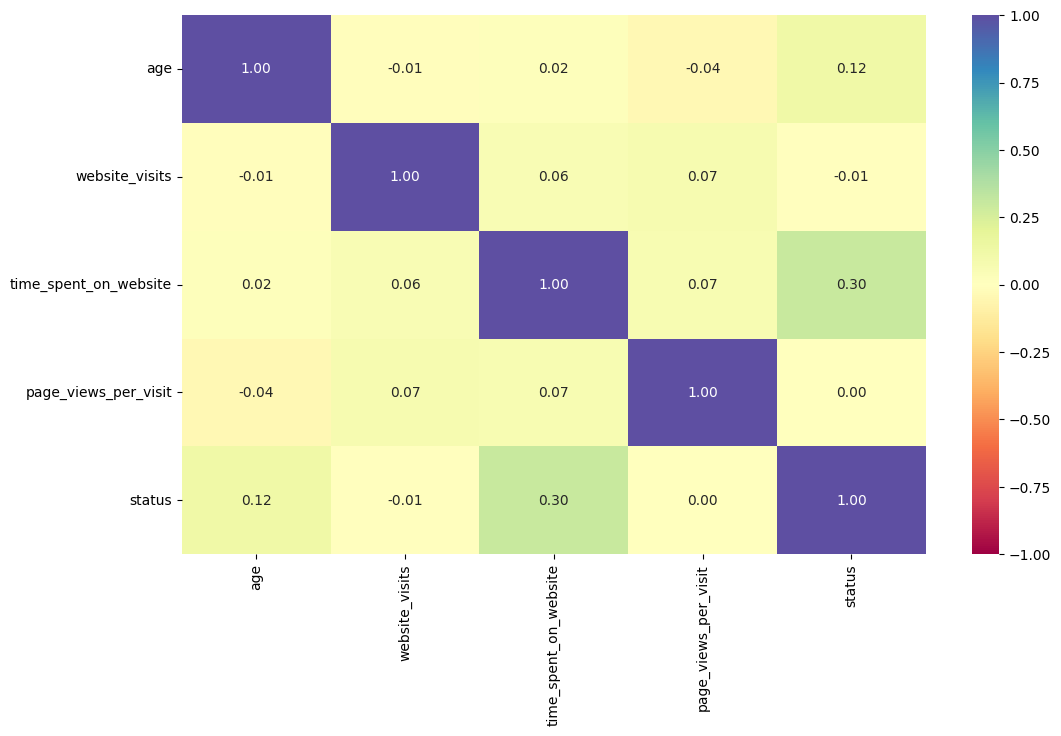

In [ ]:
#creates a correlation heatmap:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
#calculates counts and proportions of the target variable across different categories of the predictor, displaying them in a stacked bar chart.
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


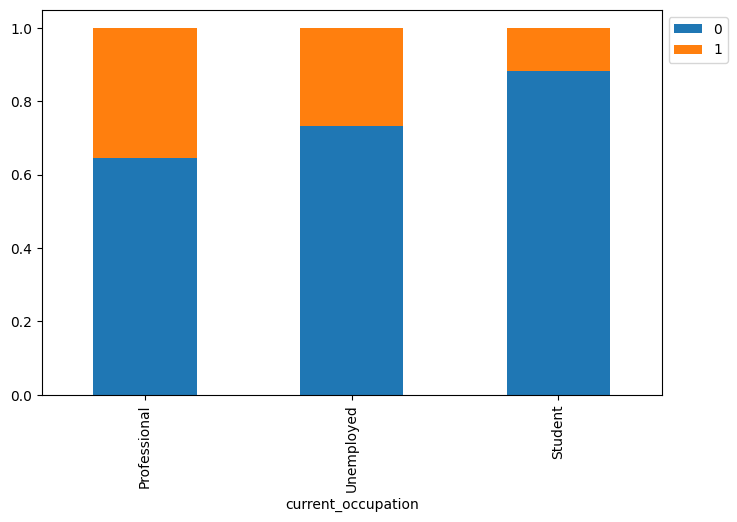

In [ ]:
#leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program
stacked_barplot(data, "current_occupation", "status")

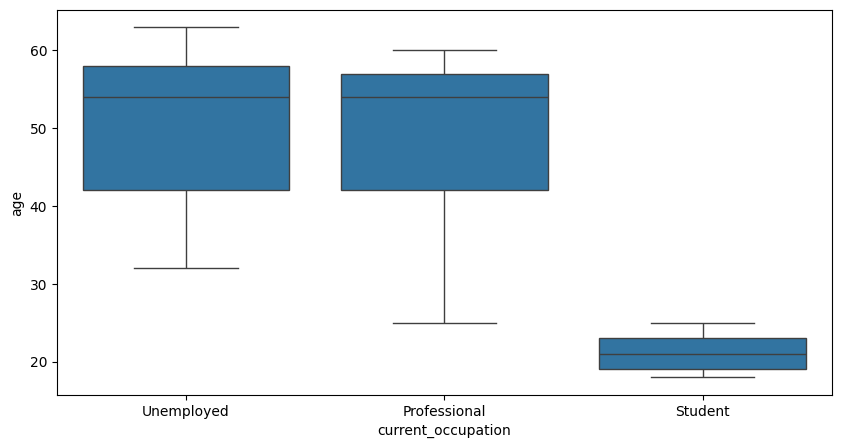

In [ ]:
#age can be a good factor to differentiate between such leads
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [ ]:
#distribution across different current occupations.
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


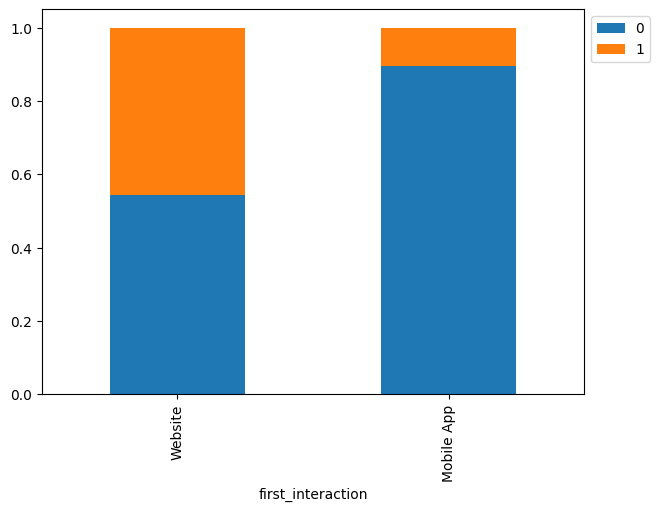

In [ ]:
#see if the channels of the first interaction have an impact on the conversion of leads
stacked_barplot(data, 'first_interaction', 'status')

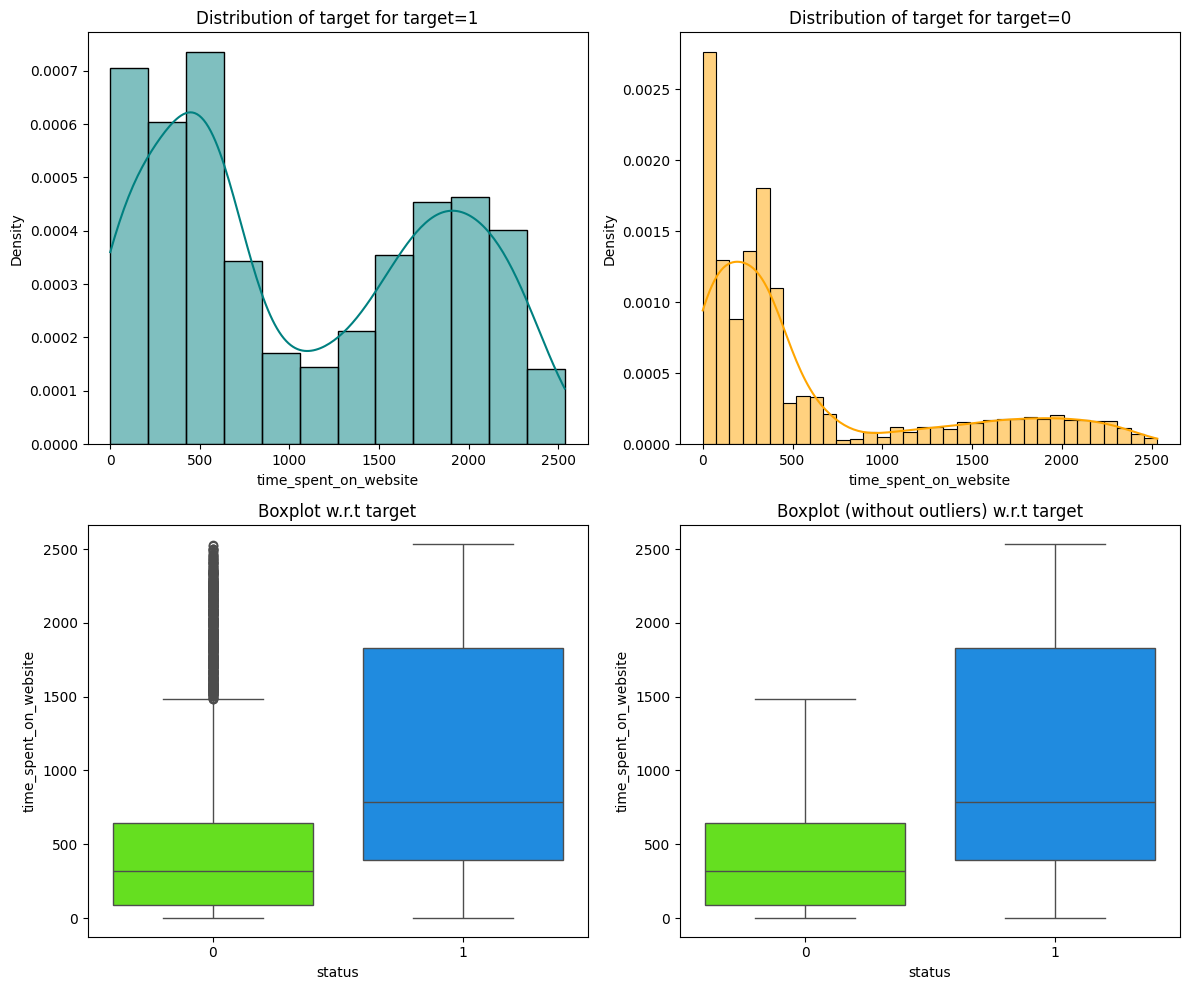

In [ ]:
#the time spent and the lead conversion status
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [ ]:
#checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

,time_spent_on_website
status,
0,317.00000
1,789.00000


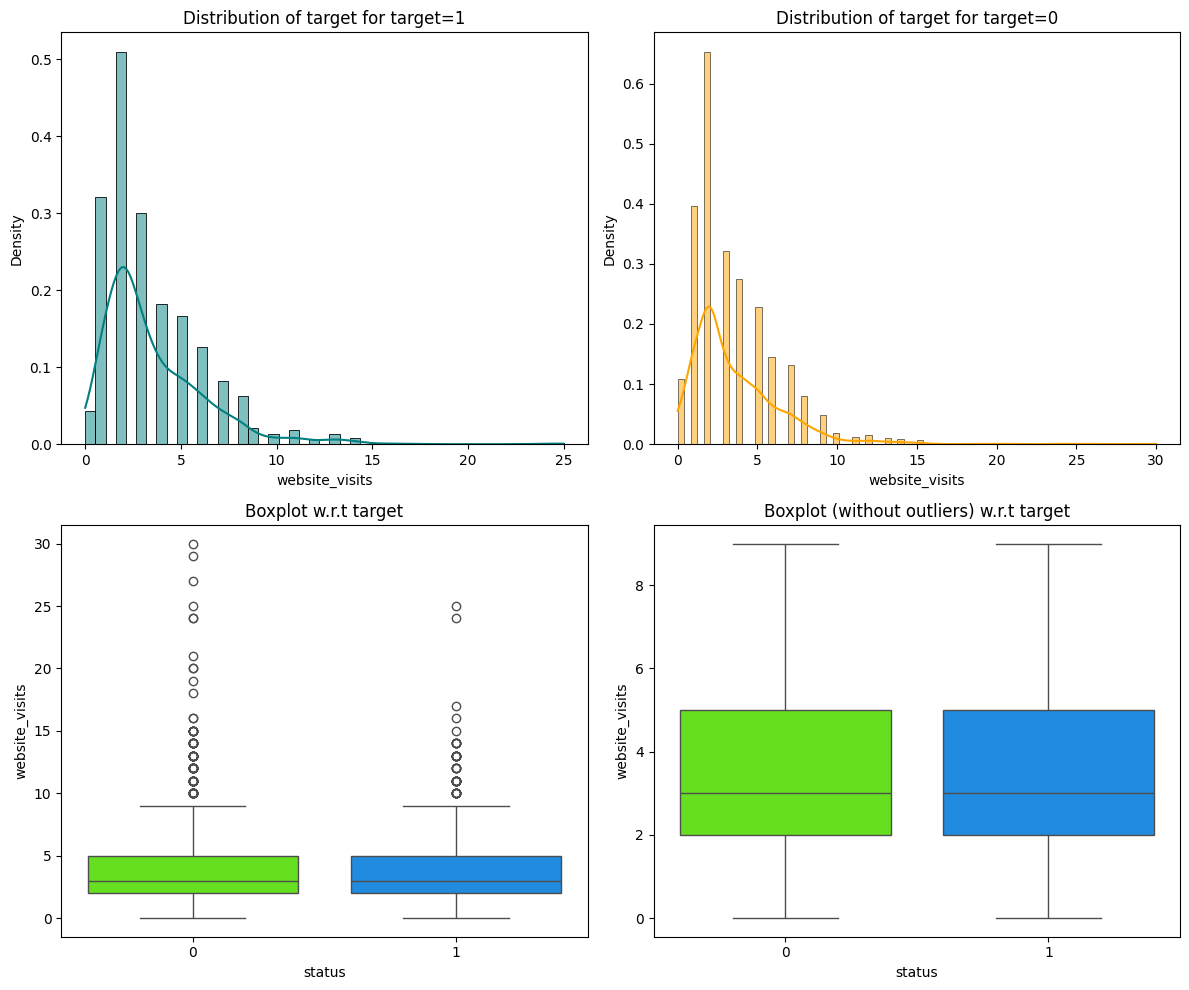

In [ ]:
#similar analysis for time spent on website and page views per visit
distribution_plot_wrt_target(data, 'website_visits', 'status')

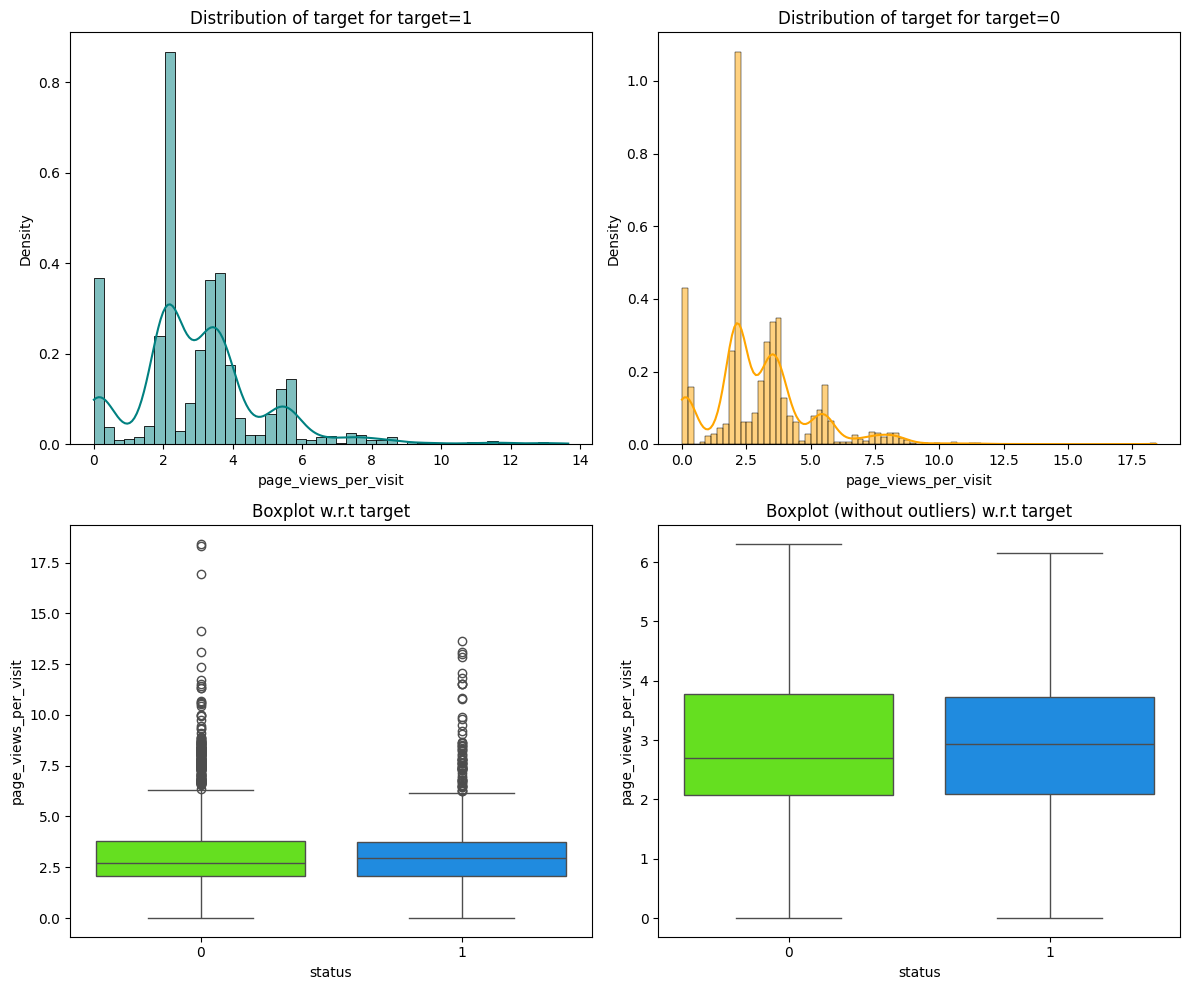

In [ ]:
#plot distribution for page_views_per_visit and status
distribution_plot_wrt_target(data, 'page_views_per_visit', 'status')

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


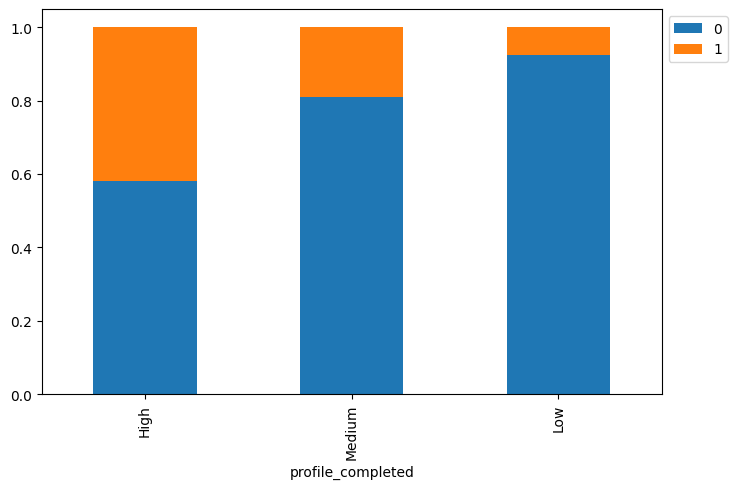

In [ ]:
#see if the profile completion level has an impact on lead status
stacked_barplot(data, 'profile_completed', 'status')

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


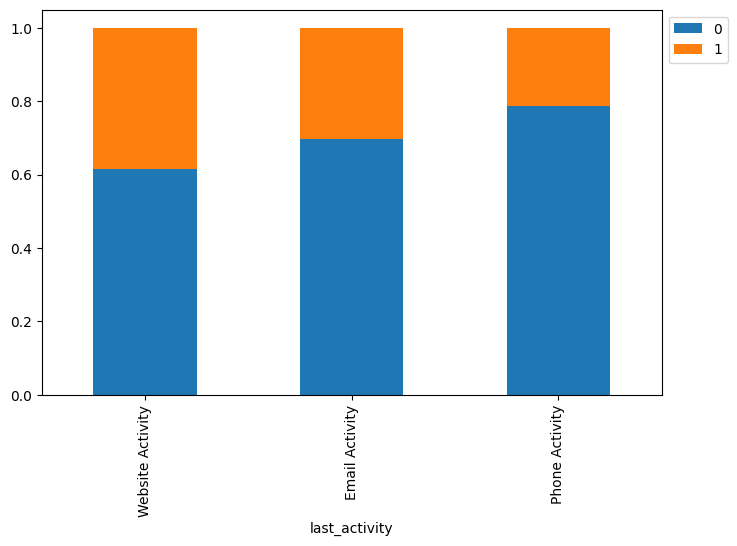

In [ ]:
#see how the last activity impacts lead conversion status
stacked_barplot(data, 'last_activity', 'status')

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


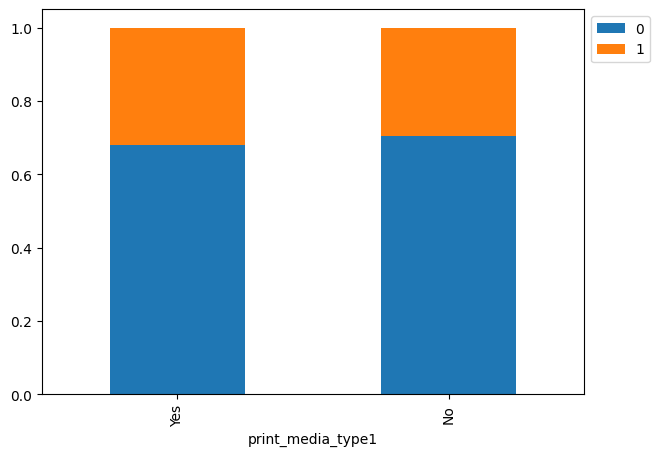

In [ ]:
#see how advertisement and referrals impact the lead status
stacked_barplot(data, 'print_media_type1', 'status')

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


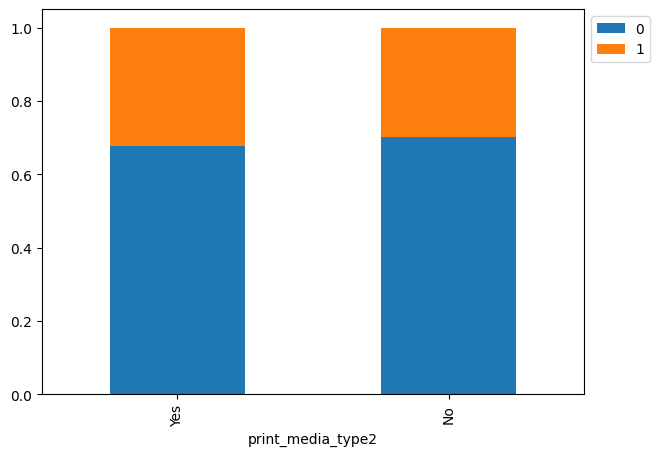

In [ ]:
#plot stacked_barplot for print_media_type2 and status
stacked_barplot(data, 'print_media_type2', 'status')

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


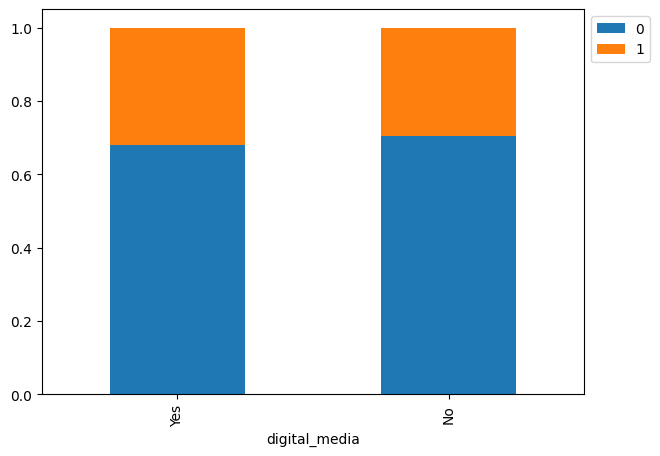

In [ ]:
#plot stacked_barplot for digital_media and status
stacked_barplot(data, 'digital_media', 'status')

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


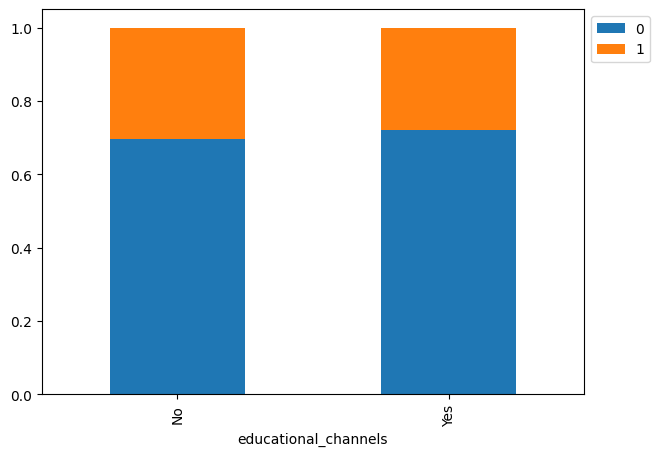

In [ ]:
#plot stacked_barplot for educational_channels and status
stacked_barplot(data, 'educational_channels', 'status')

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


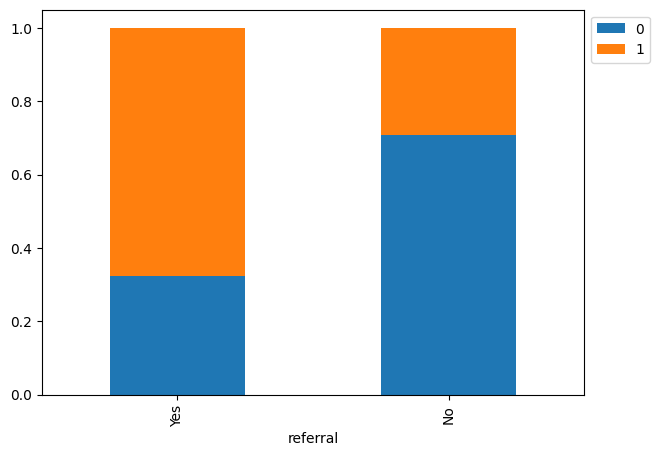

In [ ]:
#plot stacked_barplot for referral and status
stacked_barplot(data, 'referral', 'status')

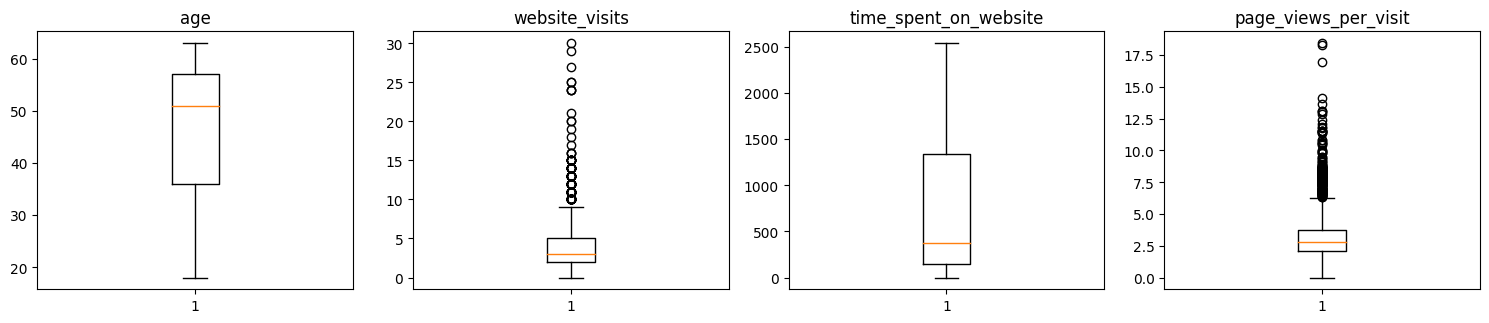

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##Observations

Older leads (median age 54) are more likely to convert than younger leads (median age 21).

Converting leads spend more time (1068.40 seconds) on the website compared to non-converting leads (577.42 seconds).

Converting leads view fewer pages (3.03) but are more decisive in finding relevant content.

High-profile completion correlates with higher conversion rates.

Email activity drives higher conversion rates (691 of 2278).

Website interactions lead to higher conversions (1159 of 2542) compared to mobile app interactions.

Digital media and educational channels yield higher conversion rates.

Referrals have a higher conversion rate (63 of 93) than non-referrals (1314 of 3205).

## Secondary Exploratory Data Analysis

In [ ]:
X = data.drop(["status"], axis=1)
Y = data["status"] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
#overview of the data
print(data.head())
print(data.info())
print(data.describe(include='all'))

   age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High               7   
1   56       Professional        Mobile App            Medium               2   
2   52       Professional           Website            Medium               3   
3   53         Unemployed           Website              High               4   
4   23            Student           Website              High               4   

   time_spent_on_website  page_views_per_visit     last_activity  \
0                   1639               1.86100  Website Activity   
1                     83               0.32000  Website Activity   
2                    330               0.07400  Website Activity   
3                    464               2.05700  Website Activity   
4                    600              16.91400    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes         

status
0   0.70143
1   0.29857
Name: proportion, dtype: float64


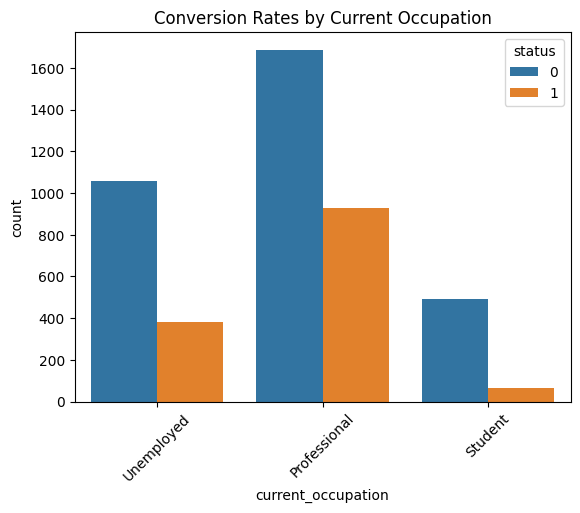

In [ ]:
#analyzing conversion rates
conversion_rates = data['status'].value_counts(normalize=True)
print(conversion_rates)

#visualizing conversion rates by occupation
sns.countplot(data=data, x='current_occupation', hue='status')
plt.title('Conversion Rates by Current Occupation')
plt.xticks(rotation=45)
plt.show()

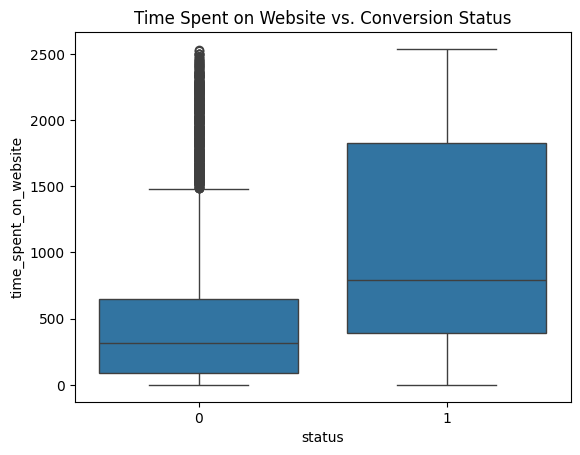

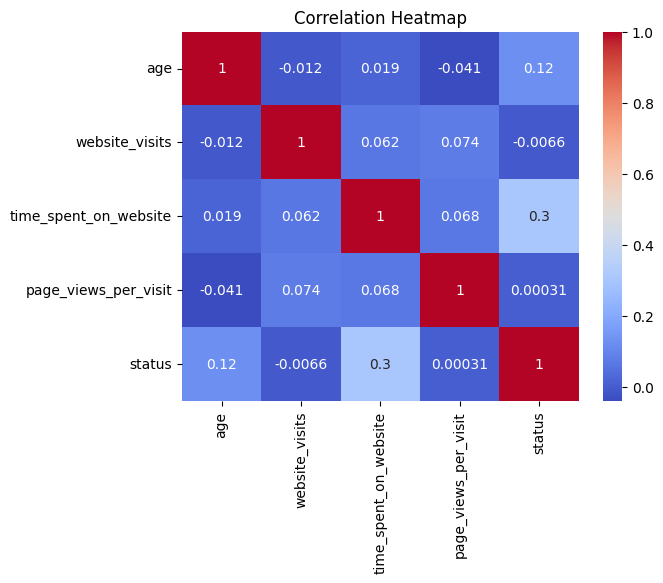

In [ ]:
#time spent on website vs. conversion status
sns.boxplot(data=data, x='status', y='time_spent_on_website')
plt.title('Time Spent on Website vs. Conversion Status')
plt.show()

#correlation analysis
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Building a Decision Tree model

In [ ]:
#fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



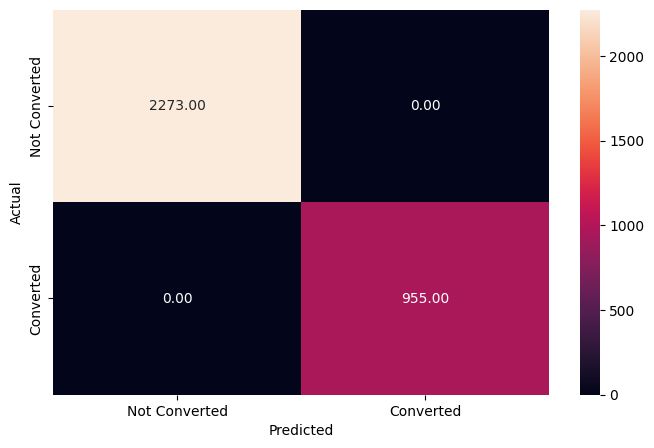

In [ ]:
#checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



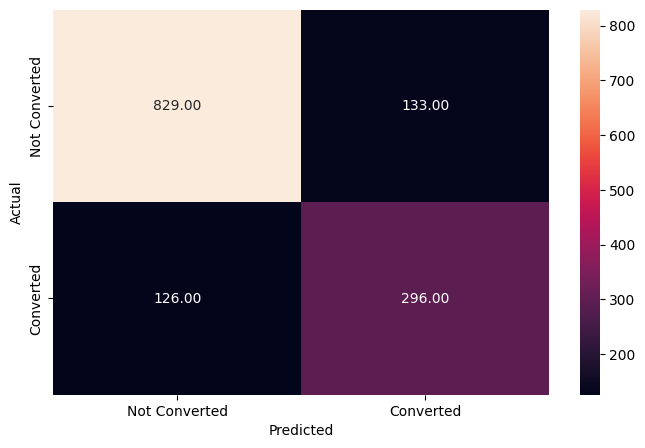

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

##Observations

The model achieves perfect metrics (1.00 precision, recall, F1-score) on the training data, indicating overfitting and potential poor generalization to new data.
On testing data, Class 0 has strong performance (precision 0.87, recall 0.86), while Class 1 shows weaker metrics (precision 0.69, recall 0.70), suggesting difficulty in identifying positive cases.
The significant performance gap between classes indicates potential bias toward the majority class (Class 0).
The model achieves 81% accuracy on the test set, but improvements are needed for Class 1.
The macro average scores (0.78) reveal imbalanced performance, while weighted averages (0.81) reflect better alignment with class distribution.
To enhance performance, consider further pruning, parameter tuning, or alternative modeling strategies, especially for Class 1.

## Do we need to prune the tree?

In [ ]:
#choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

#grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

#type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

#run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

#set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

#fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



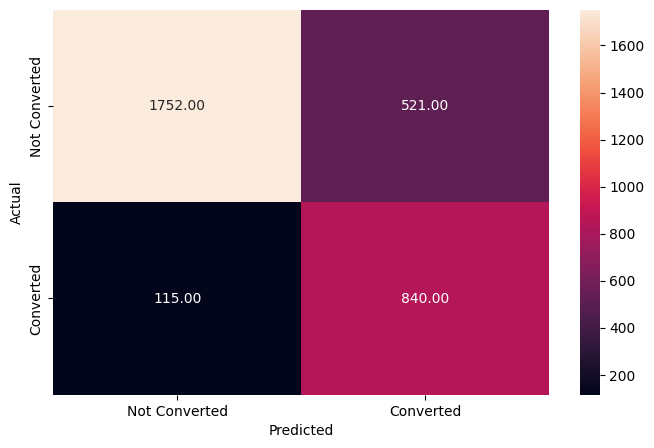

In [ ]:
#checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



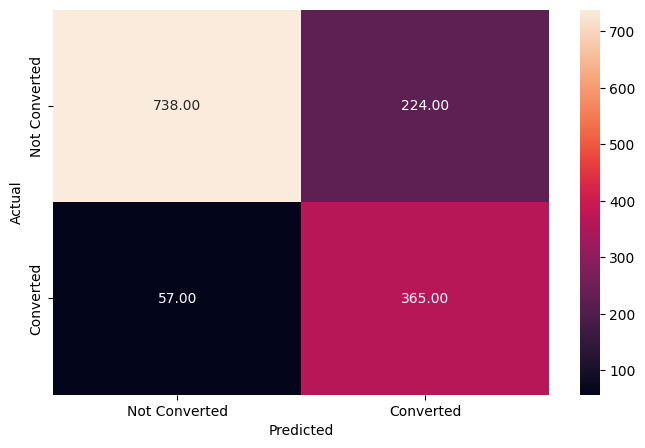

In [ ]:
#checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)



##Observations:

Class 0 shows a precision of 0.94 and recall of 0.77 (F1-score: 0.85). Class 1 has a precision of 0.62 and a high recall of 0.88 (F1-score: 0.73).
Testing Performance: Class 0 has a precision of 0.93 and recall of 0.77 (F1-score: 0.84), while Class 1 maintains a precision of 0.62 and recall of 0.86 (F1-score: 0.72).
The model achieves an accuracy of 80% on both training and testing datasets.
Macro averages are 0.78 (precision), 0.83 (recall), and 0.79 (F1) for training; slightly lower for testing at 0.77, 0.82, and 0.78, respectively.
Class 1's lower precision suggests potential issues with false positives.
Consider hyperparameter tuning or class balancing techniques to improve performance, particularly for Class 1.



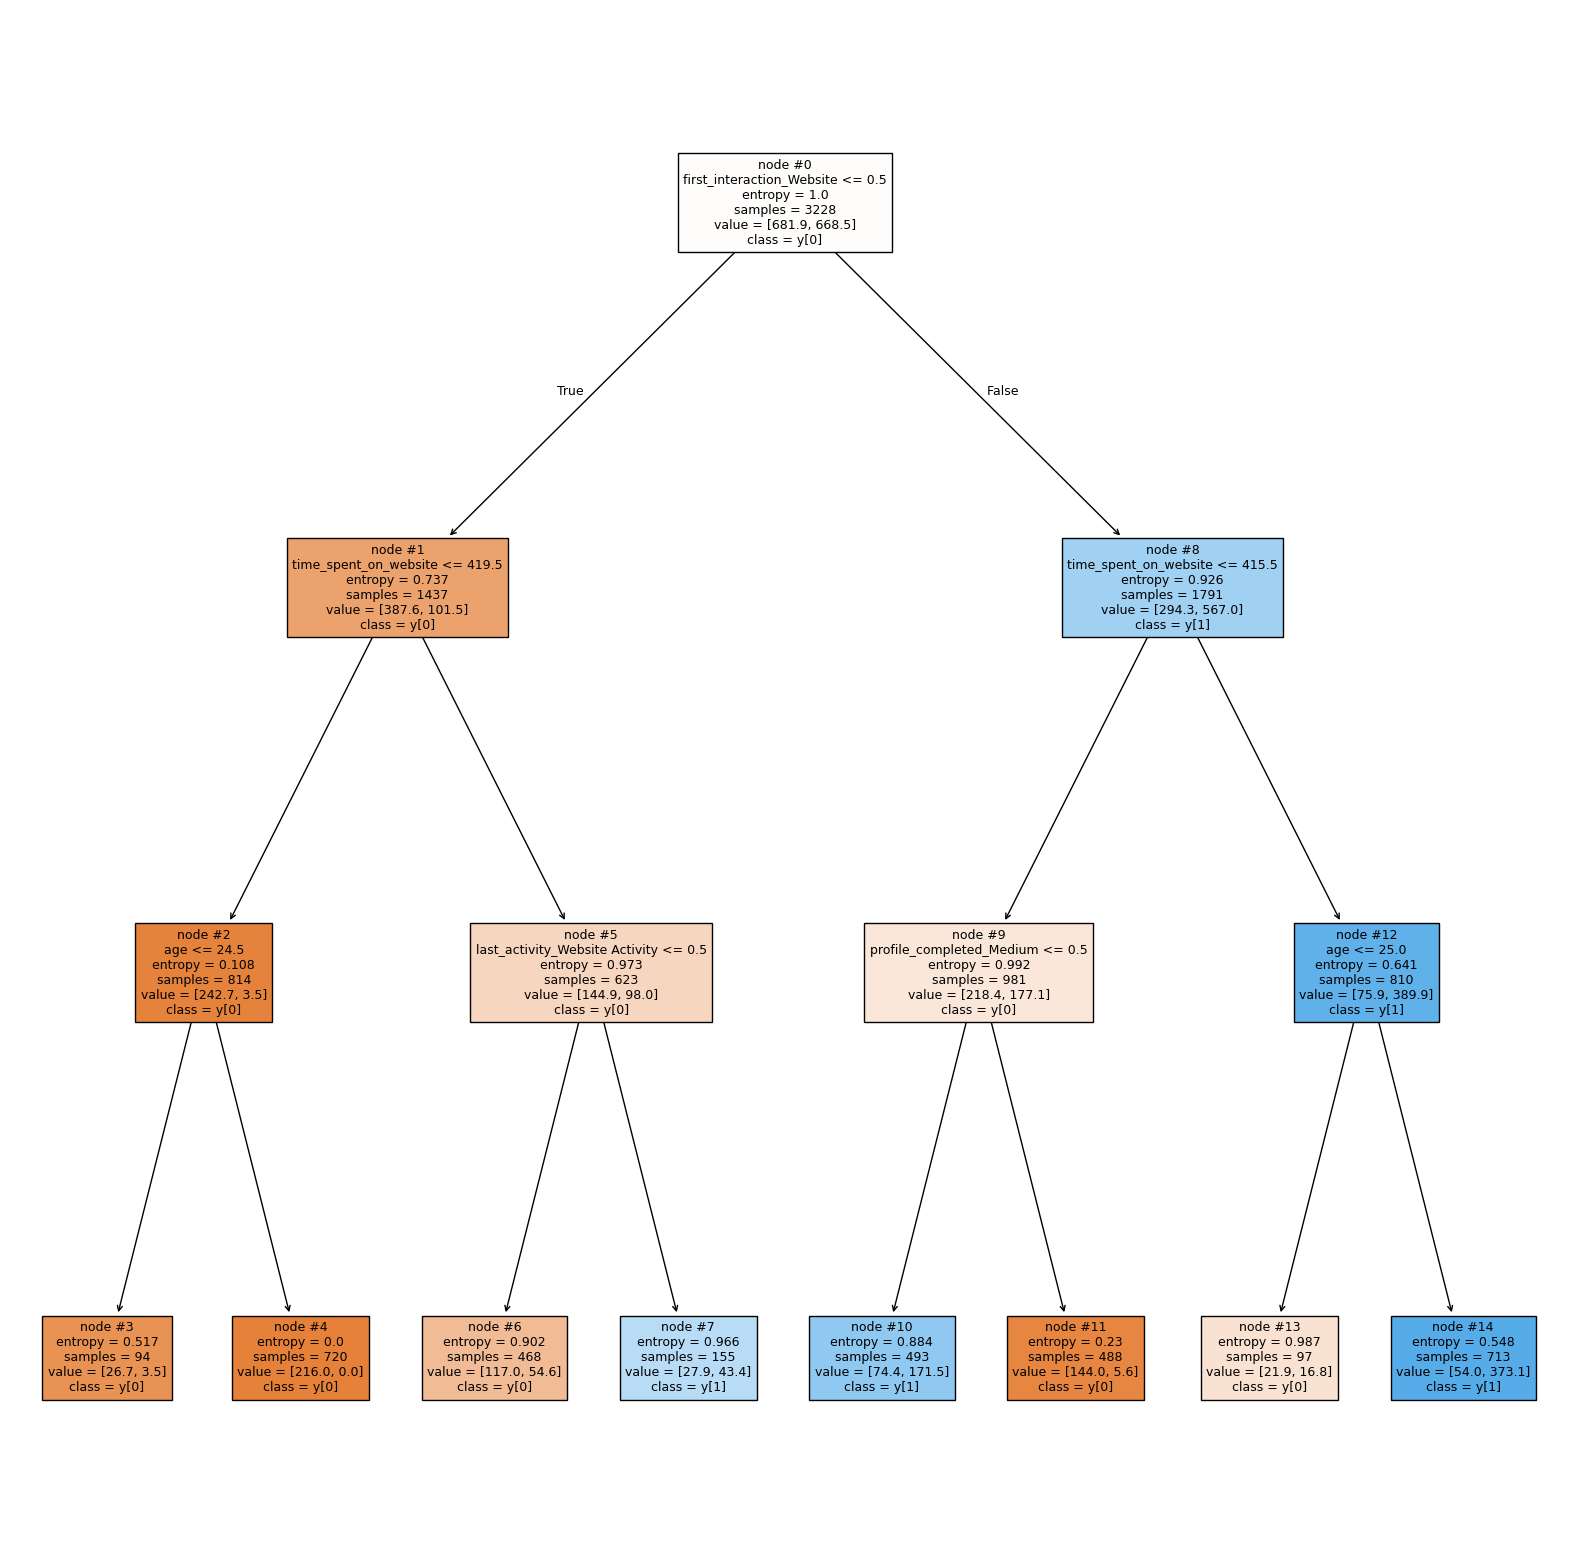

In [ ]:
#Visualizing the Decision Tree
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()


##Observations
Class 1: More page views (e.g., over 9.82) and time spent on the site (over 657.50 seconds). Users from referral channels often classified as class 1. Certain IDs help categorize users into class 1.

Class 0: Fewer page views (e.g., under 3.49) and less time spent (under 420.50 seconds). Users with low profile completion or unemployed tend to be class 0. Less website interaction leads to class 0 classification

In [ ]:
#importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


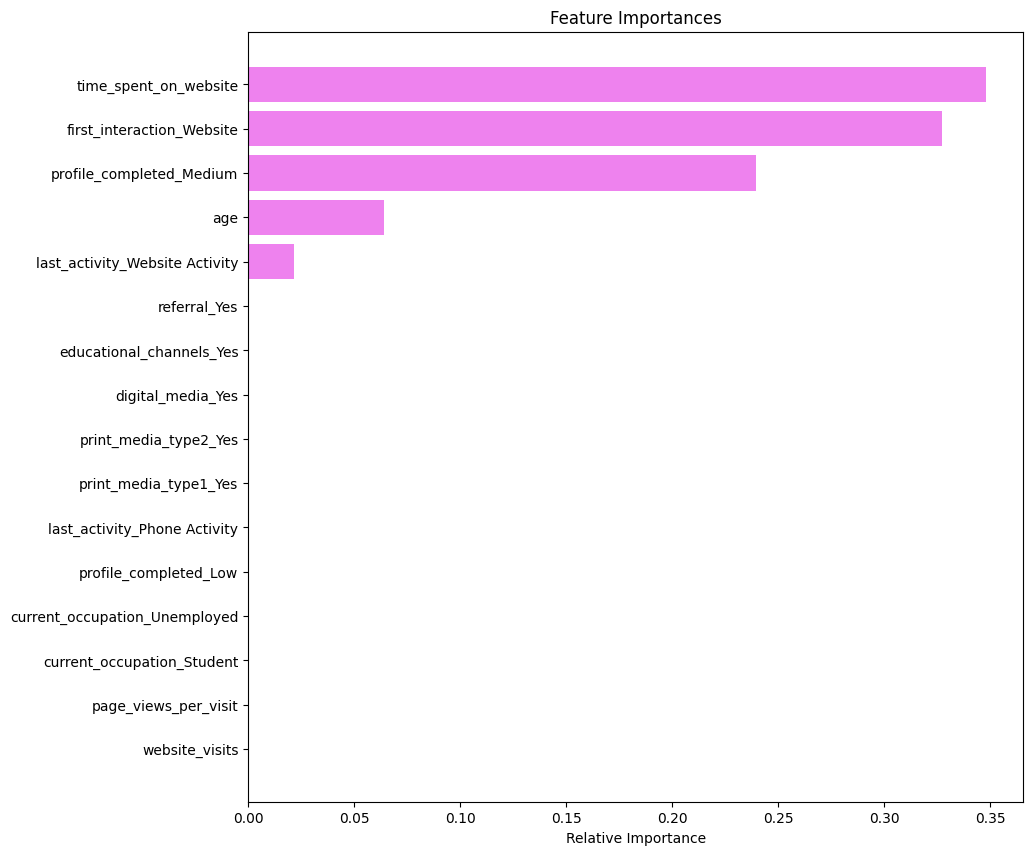

In [ ]:
#plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

##Observations

Time spent on the website and first_interaction_website are the most important features followed by profile_completed, age, and last_activity.
The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.


## Building a Random Forest model

In [ ]:
#fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier()

rf_estimator.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train3)
print(f"Training Accuracy: {train_accuracy}")

train_conf_matrix = confusion_matrix(y_train, y_pred_train3)
print(f"Confusion Matrix:\n{train_conf_matrix}")

Training Accuracy: 1.0
Confusion Matrix:
[[2273    0]
 [   0  955]]


In [ ]:
#checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test3)
print(f"Testing Accuracy: {test_accuracy:.2f}")

test_conf_matrix = confusion_matrix(y_test, y_pred_test3)
print(f"Confusion Matrix:\n{test_conf_matrix}")

Testing Accuracy: 0.85
Confusion Matrix:
[[888  74]
 [133 289]]


##Observations
Out of 2273 actual class 0 samples, all were predicted correctly. All 955 actual class 1 samples were predicted correctly as well. The confusion matrix shows no misclassified samples. A training accuracy of 1.0 may suggest overfitting. Although the model performs flawlessly on the training data, it might struggle to generalize effectively to new, unseen data.

The model achieved a testing accuracy of 0.85, indicating reasonable performance but with room for improvement.

The confusion matrix reveals that the model correctly identified 920 true negatives (TN) and 261 true positives (TP), but also misclassified 42 instances as false positives (FP) and missed 161 instances as false negatives (FN). This breakdown highlights the model's strengths in identifying class 0 while indicating challenges in accurately predicting class 1.

## Pruning the Tree

In [ ]:
#choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

#grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

#type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

#run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(estimator=rf_estimator_tuned, param_grid=parameters, scoring=scorer, cv=5)


grid_obj.fit(X_train, y_train)

#save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
#fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

In [ ]:
#checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

#calculating training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train4)
print(f"Training Accuracy: {train_accuracy:.2f}")

#creating confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_pred_train4)
print(f"Confusion Matrix:\n{train_conf_matrix}")

Training Accuracy: 0.84
Confusion Matrix:
[[1876  397]
 [ 121  834]]


In [ ]:
#checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

#calculating test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test4)
print(f"Test Accuracy: {test_accuracy:.2f}")

#creating confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_pred_test4)
print(f"Confusion Matrix:\n{test_conf_matrix}")

Test Accuracy: 0.83
Confusion Matrix:
[[795 167]
 [ 62 360]]




##Observations
The model exhibits a training accuracy of 0.84, indicating it correctly classified 84% of the training instances. The confusion matrix reveals 1,878 true negatives (TN) and 833 true positives (TP), with 395 false positives (FP) and 122 false negatives (FN).

For the test data, the accuracy remains consistent at 0.84, with a confusion matrix showing 799 TN and 361 TP, along with 163 FP and 61 FN. The stable accuracy across both datasets suggests the model is generalizing well; however, the number of false positives and false negatives indicates there may be room for improvement in correctly predicting class 1 instances.


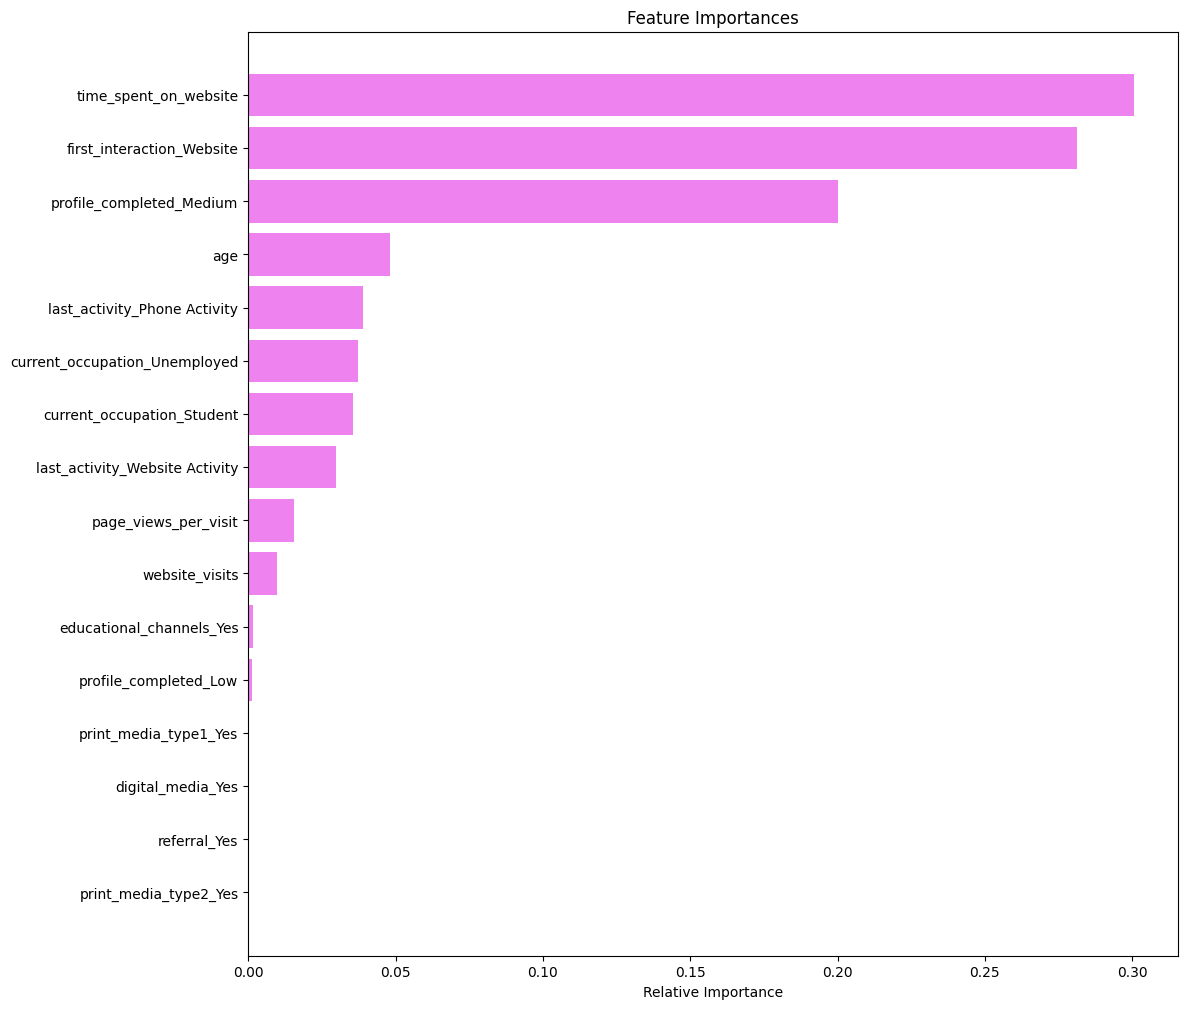

In [ ]:
#plotting the feature importance
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

##Observations

Similar to the decision tree model, time spent on website, first_interaction_website, profile_completed, and age are the top four features that help distinguish between not converted and converted leads.

Unlike the decision tree, the random forest gives some importance to other variables like occupation, page_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.


## Actionable Insights and Recommendations

###Optimize Email Marketing Strategies to Maximize Conversion Rates

* Segment email lists based on lead behavior and interests to personalize outreach.
* Design and implement personalized email campaigns with tailored content, utilizing the fact that email drives 2,278 leads.
* A/B test subject lines and content to identify the most effective messaging.
* Monitor and analyze open and click-through rates to refine strategies continuously.

**Potential Profit Increase**: 15-20%
**Cost Indicator**: Moderate
**Estimated Duration**: 1-3 months for setup

###Improve Profile Completion Initiatives to Boost Higher Interaction

* Launch a campaign to educate leads on the benefits of completing their profiles, emphasizing that 83% of leads with high profile completion converted successfully.
* Introduce incentives, such as discounts or exclusive content, for leads who fully complete their profiles.
* Provide an easy-to-follow guide on profile enhancement and best practices.
* Use automated reminders to prompt leads to complete their profiles.

**Potential Profit Increase**: 10-15%
**Cost Indicator**: Moderate
**Estimated Duration**: 1-2 months for initial implementation

###Strategic Improvements to User Experience Across Digital Platforms

* Conduct user surveys and usability tests to identify pain points in the website (2,542 interactions with a 45% conversion rate) and mobile app (2,070 interactions with a 17.5% conversion rate).
* Implement suggested improvements, such as faster loading times and intuitive navigation.
* Regularly update the app with new features based on user feedback.
* Create a dedicated feedback channel for users to report issues or suggest improvements.

**Potential Profit Increase**: 10-12%
**Cost Indicator**: High
**Estimated Duration**: 2-4 months for initial enhancements

###Targeted Marketing Strategies for Mature Demographics

* Develop marketing materials that speak directly to the interests and concerns of leads aged 54 and older, who have a conversion likelihood of approximately 50%.
* Utilize platforms frequented by this demographic for targeted ads and content.
* Host webinars or workshops focused on topics of interest to this age group.
* Collect and analyze feedback from this demographic to continuously refine marketing efforts.

**Potential Profit Increase**: 8-12%
**Cost Indicator**: Moderate
**Estimated Duration**: 1-3 months for campaign setup

###Refinement of Targeting Mechanisms Through Data Analysis

* Analyze the characteristics of leads that were falsely predicted as likely to convert, understanding that the model struggles with Class 1, leading to 42 false positives and 161 false negatives.
* Use decision tree analysis to identify the features influencing classification.
* Adjust targeting strategies based on insights from this analysis to better focus marketing efforts.
* Set up regular review sessions to monitor model performance and adapt as necessary.

**Potential Profit Increase**: 5-10%
**Cost Indicator**: Low
**Estimated Duration**: 1-2 months for initial analysis

###Innovative Strategies for Digital Media and Educational Channel Optimization

* Invest in creating high-quality, informative content for digital media channels, such as blogs and videos, especially since digital media channels currently contribute only 5% to lead acquisition.
* Launch targeted advertising campaigns aimed at increasing engagement with educational content.
* Collaborate with influencers or thought leaders in the education sector to expand reach.
* Measure the effectiveness of digital campaigns and refine approaches based on performance data.

**Potential Profit Increase**: 5-8%
**Cost Indicator**: Moderate
**Estimated Duration**: 2-4 months for content creation